# Tilts and q's with temp using Carsten's COM:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lib.calc as calc
import h5py
from imp import reload
import scipy

/users/zatterin/Envs/py3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Prepare data

In [2]:
slist =  np.load('../stitched_data/scan_list.npy')
slist

array([[ 42,  43,  44,  45],
       [ 75,  76,  77,  78],
       [102, 103, 104, 105],
       [129, 130, 131, 132],
       [156, 157, 158, 159],
       [188, 189, 190, 191],
       [217, 218, 219, 220],
       [247, 248, 249, 250],
       [275, 276, 277, 278],
       [304, 305, 306, 307],
       [327, 328, 329, 330],
       [350, 351, 352, 353],
       [373, 374, 375, 376],
       [396, 397, 398, 399],
       [419, 420, 421, 422],
       [442, 443, 444, 445],
       [465, 466, 467, 468],
       [488, 489, 490, 491]])

In [6]:
num = 0
fname = str(slist[num][0]) + '_' + str(slist[num][3])
gint = calc.read_h5_stitched_e16014(fname,'../E16014_stitch.h5') # gridded stitched intensity
Qx,Qy,Qz = calc.read_q_h5_stitched_e16014(fname,'../E16014_stitch.h5') # Q's
qx, qy, qz = calc.make_qmesh(Qx, Qy, Qz, gint) # mesh the q's

Define the ROI and inspect

In [7]:
# iroi = np.s_[230:300,250:300,140:200]
# iroi = np.s_[280:400,240:300,50:150]
# iroi = np.s_[230:290,250:300,100:170]

Quick inspection:

(120, 60, 100)


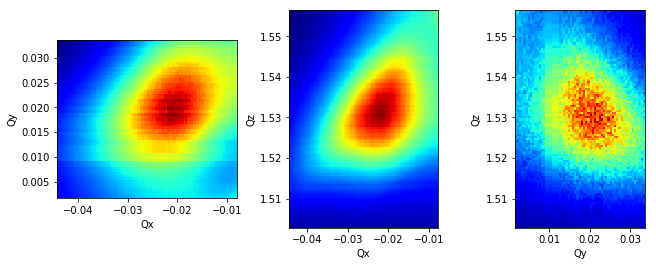

In [8]:
if num <= 5:
    iroi = np.s_[280:400,240:300,50:150]
else:
    iroi = np.s_[230:290,250:300,100:170]
roi, qxr, qyr, qzr = [array[iroi] for array in (gint, qx, qy, qz)]
roi += 1
print(roi.shape)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(11,4))
ax1.pcolormesh(qxr[:,:,0],qyr[:,:,0],roi.sum(axis=2),cmap='jet')
ax1.set_ylabel('Qy');ax1.set_xlabel('Qx')
ax1.set_aspect('equal')

ax2.pcolormesh(qxr[:,0,:],qzr[:,0,:],roi.sum(axis=1),cmap='jet')
ax2.set_ylabel('Qz');ax2.set_xlabel('Qx')
ax2.set_aspect('equal')

ax3.pcolormesh(qyr[0,:,:],qzr[0,:,:],roi.sum(axis=0),cmap='jet')
ax3.set_ylabel('Qz');ax3.set_xlabel('Qy')
ax3.set_aspect('equal')

plt.show()

### Calculate COR

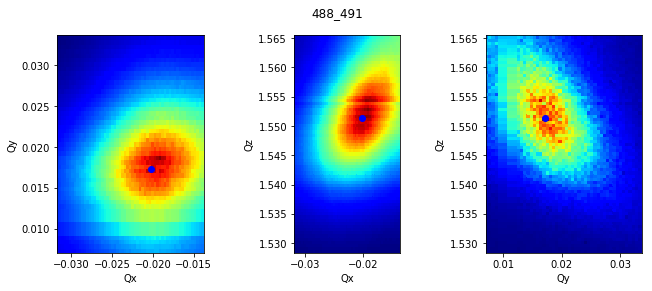

[-0.020187163529035036, 0.01725756782997398, 1.5514326174519624]


In [237]:
take = int(30)
# print(take/roi.size*100)
isort = roi.ravel().argsort()[::-1][:take]
roisort = roi.ravel()[isort]  - roi.ravel()[isort].min()
qCOM = [(arr.ravel()[isort]*roisort).sum() / roisort.sum() for arr in (qxr,qyr,qzr)]

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(11,4))
fig.suptitle(fname)

ax1.pcolormesh(qxr[:,:,0],qyr[:,:,0],roi.sum(axis=2),cmap='jet')
ax1.set_ylabel('Qy');ax1.set_xlabel('Qx')
ax1.scatter(qCOM[0],qCOM[1],c='b')
ax1.set_aspect('equal')

ax2.pcolormesh(qxr[:,0,:],qzr[:,0,:],roi.sum(axis=1),cmap='jet')
ax2.set_ylabel('Qz');ax2.set_xlabel('Qx')
ax2.scatter(qCOM[0],qCOM[2],c='b')
ax2.set_aspect('equal')

ax3.pcolormesh(qyr[0,:,:],qzr[0,:,:],roi.sum(axis=0),cmap='jet')
ax3.set_ylabel('Qz');ax3.set_xlabel('Qy')
ax3.scatter(qCOM[1],qCOM[2],c='b')
ax3.set_aspect('equal')

plt.savefig('croi_'+fname)
plt.show()
print(qCOM)

### Calculate $|\vec{q}|$ and tilts

In [238]:
qxp, qyp, qzp = qCOM

q = np.sqrt(qxp**2+qyp**2+qzp**2)

_001 = (2*np.pi)/q
ang = np.rad2deg(np.arcsin((np.sqrt(qxp**2+qyp**2)/q)))

print(_001) # length of the q vector
# print((2*np.pi)/qzp) #
print(ang) # tilt

4.04933144208
0.980727064868


## Integrated intensity

Take a smaller roi:

In [ ]:
if num <= 5:
    iroi = np.s_[280+20:400-5,240+10:300,50+20:150] # up to 191
else:
    iroi = np.s_[230+5:290,250:300-15,100+25:170]
roi, qxr, qyr, qzr = [array[iroi] for array in (gint, qx, qy, qz)]
roi += 1

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4))
fig.suptitle(fname)

ax1.pcolormesh(qxr[:,:,0],qyr[:,:,0],roi.sum(axis=2),cmap='jet')
ax1.set_ylabel('Qy');ax1.set_xlabel('Qx')
ax1.set_aspect('equal')

ax2.pcolormesh(qxr[:,0,:],qzr[:,0,:],roi.sum(axis=1),cmap='jet')
ax2.set_ylabel('Qz');ax2.set_xlabel('Qx')
ax2.set_aspect('equal')

ax3.pcolormesh(qyr[0,:,:],qzr[0,:,:],roi.sum(axis=0),cmap='jet')
ax3.set_ylabel('Qz');ax3.set_xlabel('Qy')
ax3.set_aspect('equal')

I = roi.sum().sum().sum()
print(I)

plt.show()

In [ ]:
# first = (95,50,80)
# second = (55, 35, 45)

## Make a function:

In [3]:
def calctilts(num,take):

    slist =  np.load('../stitched_data/scan_list.npy')

    # Load data
    fname = str(slist[num][0]) + '_' + str(slist[num][3])
    gint = calc.read_h5_stitched_e16014(fname) # gridded stitched intensity
    Qx,Qy,Qz = calc.read_q_h5_stitched_e16014(fname) # Q's
    qx, qy, qz = calc.make_qmesh(Qx, Qy, Qz, gint) # mesh the q's

    # Make ROI
    if num <= 5:
        iroi = np.s_[280:400,240:300,50:150]
    else:
        iroi = np.s_[230:290,250:300,100:170]
    roi, qxr, qyr, qzr = [array[iroi] for array in (gint, qx, qy, qz)]
    roi += 1

    # Calc COM
    isort = roi.ravel().argsort()[::-1][:take]
    roisort = roi.ravel()[isort]  - roi.ravel()[isort].min()
    qCOM = [(arr.ravel()[isort]*roisort).sum() / roisort.sum() for arr in (qxr,qyr,qzr)]

    # Plot ROI + COM
    fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(11,4))
    fig.suptitle(fname)

    ax1.pcolormesh(qxr[:,:,0],qyr[:,:,0],roi.sum(axis=2),cmap='jet')
    ax1.set_ylabel('Qy');ax1.set_xlabel('Qx')
    ax1.scatter(qCOM[0],qCOM[1],c='b')
    ax1.set_aspect('equal')

    ax2.pcolormesh(qxr[:,0,:],qzr[:,0,:],roi.sum(axis=1),cmap='jet')
    ax2.set_ylabel('Qz');ax2.set_xlabel('Qx')
    ax2.scatter(qCOM[0],qCOM[2],c='b')
    ax2.set_aspect('equal')

    ax3.pcolormesh(qyr[0,:,:],qzr[0,:,:],roi.sum(axis=0),cmap='jet')
    ax3.set_ylabel('Qz');ax3.set_xlabel('Qy')
    ax3.scatter(qCOM[1],qCOM[2],c='b')
    ax3.set_aspect('equal')

    plt.savefig('./croi/croi_'+str(take)+'_'+fname)
    plt.clf()

    # Calc Q and Tilts
    qxp, qyp, qzp = qCOM
    q = np.sqrt(qxp**2+qyp**2+qzp**2)
    _001 = (2*np.pi)/q
    ang = np.rad2deg(np.arcsin((np.sqrt(qxp**2+qyp**2)/q)))

    # Calc I
    if num <= 5:
        iroi = np.s_[280+20:400-5,240+10:300,50+20:150] # up to 191
    else:
        iroi = np.s_[230+5:290,250:300-15,100+25:170]
    roi, qxr, qyr, qzr = [array[iroi] for array in (gint, qx, qy, qz)]
    roi += 1

    I = roi.sum().sum().sum()

    return _001, ang, I

In [6]:
res = []
for num in range(18):
    res.append(calctilts(num,3000))

/users/zatterin/Envs/py3/lib/python3.5/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [7]:
np.savetxt('./croi/3000.txt',res)

### Plot the results

In [59]:
r30 = np.loadtxt('./croi/30.txt')
r300 = np.loadtxt('./croi/300.txt')
r3000 = np.loadtxt('./croi/3000.txt')
tempup = [50,100,150,200,250,300,400,500,600,650]
tempdown =[575,550,525,500,450,400,350,300]

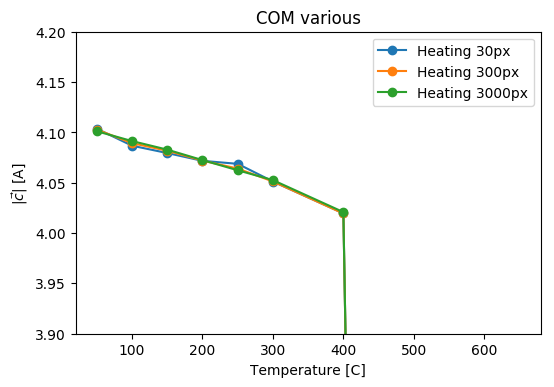

In [52]:
fig = plt.figure(1, dpi=100)
plt.title('COM various')
plt.plot(tempup,r30[0:10,0],marker='o',label='Heating 30px')
plt.plot(tempup,r300[0:10,0],marker='o',label='Heating 300px')
plt.plot(tempup,r3000[0:10,0],marker='o',label='Heating 3000px')
# plt.plot(tempdown,r30[10:,0],marker='o',label='Cooling')
plt.ylim(3.9,4.2)
# plt.ylim(4.01,4.12)
plt.xlabel('Temperature [C]')
plt.ylabel(r'$|\vec{c}$| [A]')
plt.legend()
plt.show()

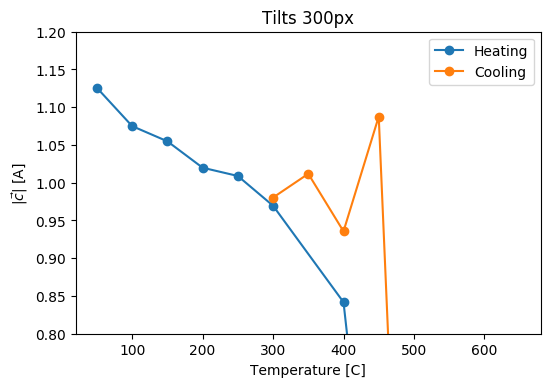

In [57]:
fig = plt.figure(1, dpi=100)
plt.title('Tilts 300px')
# plt.plot(tempup,r30[0:10,1],marker='o',label='Heating 30px')
plt.plot(tempup,r300[0:10,1],marker='o',label='Heating')
# plt.plot(tempup,r3000[0:10,1],marker='o',label='Heating 3000px')
plt.plot(tempdown,r300[10:,1],marker='o',label='Cooling')
plt.ylim(0.8,1.2)
plt.xlabel('Temperature [C]')
plt.ylabel(r'$|\vec{c}$| [A]')
plt.legend()
plt.show()

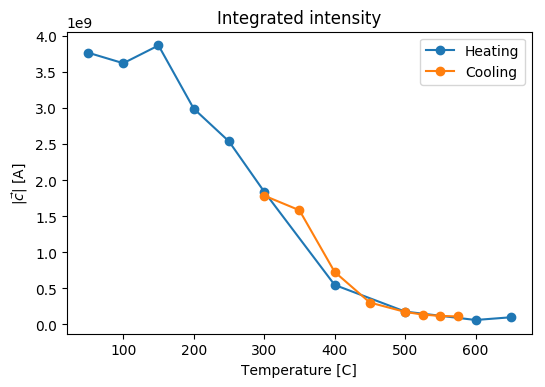

In [60]:
fig = plt.figure(1, dpi=100)
plt.title('Integrated intensity')
plt.plot(tempup,r300[0:10,2],marker='o',label='Heating')
plt.plot(tempdown,r300[10:,2],marker='o',label='Cooling')
# plt.ylim(0.8,1.2)
plt.xlabel('Temperature [C]')
plt.ylabel(r'$|\vec{c}$| [A]')
plt.legend()
plt.show()